## 2022년도 서울 지하철 열차 내부 혼잡도를 분석해보자
- 서울교통공사에서 제공하는 2022년 1년간의 지하철 1~8호선 라인 역들의 30분 단위 평균 혼잡도 데이터
- 혼잡도는 정원대비 승차인원으로 승차인과 좌석수가 일치할 경우를 혼잡도가 34%

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') #matplotlib 패키지 한글 깨짐 처리

In [3]:
df = pd.read_csv('data/서울교통공사_지하철혼잡도정보_20221231.csv', encoding='euc-kr')
df
# 총 1638개의 행이 있는데 연번을 보니까 20개가 더 있음;;;;

,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,...,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분
0,1,평일,1,150,서울역,상선,7.3,18.1,18.1,30.9,...,15.6,17.1,17.7,14.9,13.7,17.2,10.4,8.8,8.8,1.2
1,2,평일,1,150,서울역,하선,11.5,11.0,13.2,21.4,...,35.3,36.1,35.0,29.4,39.2,26.1,17.1,11.8,8.5,0.0
2,3,평일,1,151,시청,상선,6.6,15.4,14.7,25.0,...,19.1,20.7,21.8,17.5,18.5,18.4,14.9,11.5,7.0,2.8
3,4,평일,1,151,시청,하선,9.0,9.1,14.6,20.0,...,30.5,32.4,31.1,28.5,30.2,22.2,15.4,10.1,6.5,0.8
4,5,평일,1,152,종각,상선,6.3,14.4,10.7,17.6,...,26.8,25.2,29.7,22.6,26.1,24.0,19.7,14.6,9.6,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,1654,공휴일,8,2827,모란,하선,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1634,1655,공휴일,8,2828,남위례,상선,9.9,5.8,6.6,8.1,...,7.3,6.1,7.5,6.5,5.0,4.2,3.5,2.0,NaN,NaN
1635,1656,공휴일,8,2828,남위례,하선,2.1,3.0,3.7,3.0,...,17.1,16.6,22.8,19.0,18.8,14.8,15.7,10.0,NaN,NaN
1636,1657,공휴일,8,2828,남위례,상선,9.9,5.8,6.6,8.1,...,7.3,6.1,7.5,6.5,5.0,4.2,3.5,2.0,NaN,NaN


In [4]:
df.info()
# 5시 30분, 23시, 00시, 00시 30분에 빈 값 존재함!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      1638 non-null   int64  
 1   요일구분    1638 non-null   object 
 2   호선      1638 non-null   int64  
 3   역번호     1638 non-null   int64  
 4   출발역     1638 non-null   object 
 5   상하구분    1638 non-null   object 
 6   5시30분   1612 non-null   float64
 7   6시00분   1638 non-null   float64
 8   6시30분   1638 non-null   float64
 9   7시00분   1638 non-null   float64
 10  7시30분   1638 non-null   float64
 11  8시00분   1638 non-null   float64
 12  8시30분   1638 non-null   float64
 13  9시00분   1638 non-null   float64
 14  9시30분   1638 non-null   float64
 15  10시00분  1638 non-null   float64
 16  10시30분  1638 non-null   float64
 17  11시00분  1638 non-null   float64
 18  11시30분  1638 non-null   float64
 19  12시00분  1638 non-null   float64
 20  12시30분  1638 non-null   float64
 21  13시00분  1638 non-null   float64
 22  

### 데이터 파악 및 가공

In [6]:
# 확인한 빈 값이 담긴 열을 제거하기로 판단
df = df.drop(['5시30분','23시30분','00시00분','00시30분'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      1638 non-null   int64  
 1   요일구분    1638 non-null   object 
 2   호선      1638 non-null   int64  
 3   역번호     1638 non-null   int64  
 4   출발역     1638 non-null   object 
 5   상하구분    1638 non-null   object 
 6   6시00분   1638 non-null   float64
 7   6시30분   1638 non-null   float64
 8   7시00분   1638 non-null   float64
 9   7시30분   1638 non-null   float64
 10  8시00분   1638 non-null   float64
 11  8시30분   1638 non-null   float64
 12  9시00분   1638 non-null   float64
 13  9시30분   1638 non-null   float64
 14  10시00분  1638 non-null   float64
 15  10시30분  1638 non-null   float64
 16  11시00분  1638 non-null   float64
 17  11시30분  1638 non-null   float64
 18  12시00분  1638 non-null   float64
 19  12시30분  1638 non-null   float64
 20  13시00분  1638 non-null   float64
 21  13시30분  1638 non-null   float64
 22  

In [7]:
# 아까 행의 개수랑 연번이랑 매치가 안 됨. value_counts를 확인해보자.
df['호선'].value_counts()

호선
5    336
2    306
7    252
6    214
3    204
4    162
8    104
1     60
Name: count, dtype: int64

In [8]:
df['요일구분'].value_counts()

요일구분
평일     552
공휴일    544
토요일    542
Name: count, dtype: int64

In [9]:
df['역번호'].value_counts()

역번호
150     6
2624    6
2561    6
2562    6
2563    6
       ..
2615    2
2616    2
405     2
406     2
408     2
Name: count, Length: 279, dtype: int64

In [10]:
df['출발역'].value_counts()

출발역
동대문역사문화공원    18
종로3가         18
서울역          12
사당           12
대림           12
             ..
역촌            2
독바위           2
신천            2
구산            2
별내별가람         2
Name: count, Length: 243, dtype: int64

In [11]:
# 출발역 개수
len(np.unique(df['출발역']))

243

In [12]:
# 출발역이 총신대입구역인 조건으로 검색
df[df['출발역'] == '총신대입구']

,연번,요일구분,호선,역번호,출발역,상하구분,6시00분,6시30분,7시00분,7시30분,...,18시30분,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분
236,237,평일,4,432,총신대입구,상선,25.4,22.8,43.6,49.8,...,38.6,25.7,17.3,17.2,14.9,13.6,18.5,23.5,17.1,15.1
237,238,평일,4,432,총신대입구,하선,28.5,17.0,22.6,34.3,...,75.1,46.8,32.8,25.5,29.3,25.7,30.8,36.0,30.1,26.6
486,487,평일,7,2738,총신대입구,상선,61.4,51.4,82.1,101.4,...,37.6,32.3,29.2,24.9,24.1,27.2,24.2,22.8,18.2,16.4
487,488,평일,7,2738,총신대입구,하선,21.2,17.7,26.7,37.0,...,92.5,81.9,59.1,48.8,53.7,53.4,56.6,59.1,66.0,44.6
794,795,토요일,4,432,총신대입구,상선,13.6,13.2,14.1,21.8,...,33.8,28.0,24.5,19.6,22.0,23.1,19.7,20.2,19.9,23.7
795,796,토요일,4,432,총신대입구,하선,20.2,12.6,11.6,13.6,...,49.3,38.2,34.9,33.3,32.1,38.1,38.0,37.1,34.4,38.9
1034,1045,토요일,7,2738,총신대입구,상선,46.4,31.0,34.2,33.9,...,33.3,24.7,22.2,19.4,20.0,20.5,19.5,18.0,19.0,24.3
1035,1046,토요일,7,2738,총신대입구,하선,17.4,12.5,13.8,20.9,...,49.6,40.3,39.9,38.2,43.6,47.6,46.2,42.6,45.1,29.9
1330,1341,공휴일,4,432,총신대입구,상선,7.8,7.1,8.6,14.7,...,33.9,25.6,19.1,21.1,18.2,19.6,13.5,13.1,11.7,13.3
1331,1342,공휴일,4,432,총신대입구,하선,11.7,8.3,6.8,7.5,...,32.9,33.7,27.4,26.0,28.0,30.8,27.4,22.1,21.4,20.9


### 최대 혼잡도가 가장 높은 역을 찾아보자!!!
- '연번'칼럼에서 '상하구분' 컬럼까지 분리
- 전체시간에서 혼잡도가 최대인 값을 구해서 '최대혼잡도'컬럼을 생성한 후, 이 둘을 합치기

In [14]:
left = df.loc[:,:'상하구분']
right = df.loc[:,'6시00분':]
right.head()

,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,10시30분,...,18시30분,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분
0,18.1,18.1,30.9,56.6,69.1,82.7,57.5,52.3,36.9,31.8,...,39.1,28.3,21.3,15.6,17.1,17.7,14.9,13.7,17.2,10.4
1,11.0,13.2,21.4,38.0,38.7,24.6,24.0,19.8,18.8,21.0,...,82.2,46.5,37.1,35.3,36.1,35.0,29.4,39.2,26.1,17.1
2,15.4,14.7,25.0,42.4,55.0,56.0,44.3,48.2,30.5,29.8,...,47.5,33.2,24.7,19.1,20.7,21.8,17.5,18.5,18.4,14.9
3,9.1,14.6,20.0,35.4,35.7,26.9,26.0,20.6,18.9,19.7,...,74.2,40.7,32.2,30.5,32.4,31.1,28.5,30.2,22.2,15.4
4,14.4,10.7,17.6,26.7,36.0,31.2,28.0,36.5,27.4,24.8,...,54.9,39.6,28.9,26.8,25.2,29.7,22.6,26.1,24.0,19.7


In [15]:
right = right.max(axis=1)

In [16]:
# concat으로 붙였을 때 Series의 이름이 컬럼명으로 들어감.
right.name = '최대혼잡도'

In [17]:
max_crowd = pd.concat([left, right],axis=1)
max_crowd

,연번,요일구분,호선,역번호,출발역,상하구분,최대혼잡도
0,1,평일,1,150,서울역,상선,82.7
1,2,평일,1,150,서울역,하선,107.8
2,3,평일,1,151,시청,상선,58.1
3,4,평일,1,151,시청,하선,105.5
4,5,평일,1,152,종각,상선,76.1
...,...,...,...,...,...,...,...
1633,1654,공휴일,8,2827,모란,하선,0.0
1634,1655,공휴일,8,2828,남위례,상선,23.7
1635,1656,공휴일,8,2828,남위례,하선,22.8
1636,1657,공휴일,8,2828,남위례,상선,23.7


In [18]:
max_crowd = max_crowd.sort_values(by = '최대혼잡도',ascending = False)
max_crowd
# 성신여대입구가 가장 혼잡함. 지하철노선도를 보면서 왜 그런지 이유를 파악해보자.
# 성신여대입구 근처 지역에 지하철이 별로 없음, 성신여대입구는 더블 역세권, 대학생과 직장인이 많음.
# 역시 도메인 지식이 중요하다......

,연번,요일구분,호선,역번호,출발역,상하구분,최대혼잡도
209,210,평일,4,418,성신여대입구,하선,185.5
211,212,평일,4,419,한성대입구,하선,184.5
207,208,평일,4,417,길음,하선,176.2
71,72,평일,2,226,사당,외선,172.3
213,214,평일,4,420,혜화,하선,171.5
...,...,...,...,...,...,...,...
672,673,토요일,2,260,까치산,내선,0.0
356,357,평일,6,2612,역촌,상선,0.0
120,121,평일,2,260,까치산,내선,0.0
189,190,평일,3,342,오금,하선,0.0


### 평일 총신대입구역에서 동작 방면으로 운행하는 열차의 시간별 혼잡도를 분석
- keyword:
  1. 평일: '요일구분'컬럼
  2. 총신대입구: '출발역'컬럼
  3. 동작 방면: 4호선('호선'컬럼)이면서 상선('상하구분'컬럼)

In [20]:
cs_up= df[(df['요일구분'] == '평일')&(df['출발역'] == '총신대입구')&(df['호선'] == 4)&(df['상하구분'] == '상선')]
cs_up

,연번,요일구분,호선,역번호,출발역,상하구분,6시00분,6시30분,7시00분,7시30분,...,18시30분,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분
236,237,평일,4,432,총신대입구,상선,25.4,22.8,43.6,49.8,...,38.6,25.7,17.3,17.2,14.9,13.6,18.5,23.5,17.1,15.1


In [21]:
cs_up= cs_up.loc[:,'6시00분':]
cs_up

,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,10시30분,...,18시30분,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분
236,25.4,22.8,43.6,49.8,70.9,59.0,47.7,48.4,32.8,27.4,...,38.6,25.7,17.3,17.2,14.9,13.6,18.5,23.5,17.1,15.1


In [22]:
# 평균 혼잡도
cs_up.mean(axis=1)
# 혼잡도가 30정도이므로 34에 비해 조금 낮은 수준(열차 빈자리가 조금 남아 있는 정도)

236    30.988571
dtype: float64

In [23]:
# 최대 혼잡도
cs_up.max(axis=1)

236    70.9
dtype: float64

In [24]:
x = cs_up.columns

In [26]:
cs_up.values # 이걸 y축 값으로 쓰면 에러남. result.values는 2차원 배열이기 때문에 1차원으로 차수를 내려야한다.

array([[25.4, 22.8, 43.6, 49.8, 70.9, 59. , 47.7, 48.4, 32.8, 27.4, 30.6,
        26.5, 30.7, 31.4, 30.8, 25.8, 29.3, 24.5, 27.7, 20. , 31.1, 35.9,
        36.6, 35.5, 38.9, 38.6, 25.7, 17.3, 17.2, 14.9, 13.6, 18.5, 23.5,
        17.1, 15.1]])

In [28]:
# reshape(-1)로 1차원으로 차수 내리기
y = cs_up.values.reshape(-1)

### plot chart를 활용하여 총신대입구역에서 동작방면으로 시간대별 혼잡도 변화 추이를 시각화 해보자!

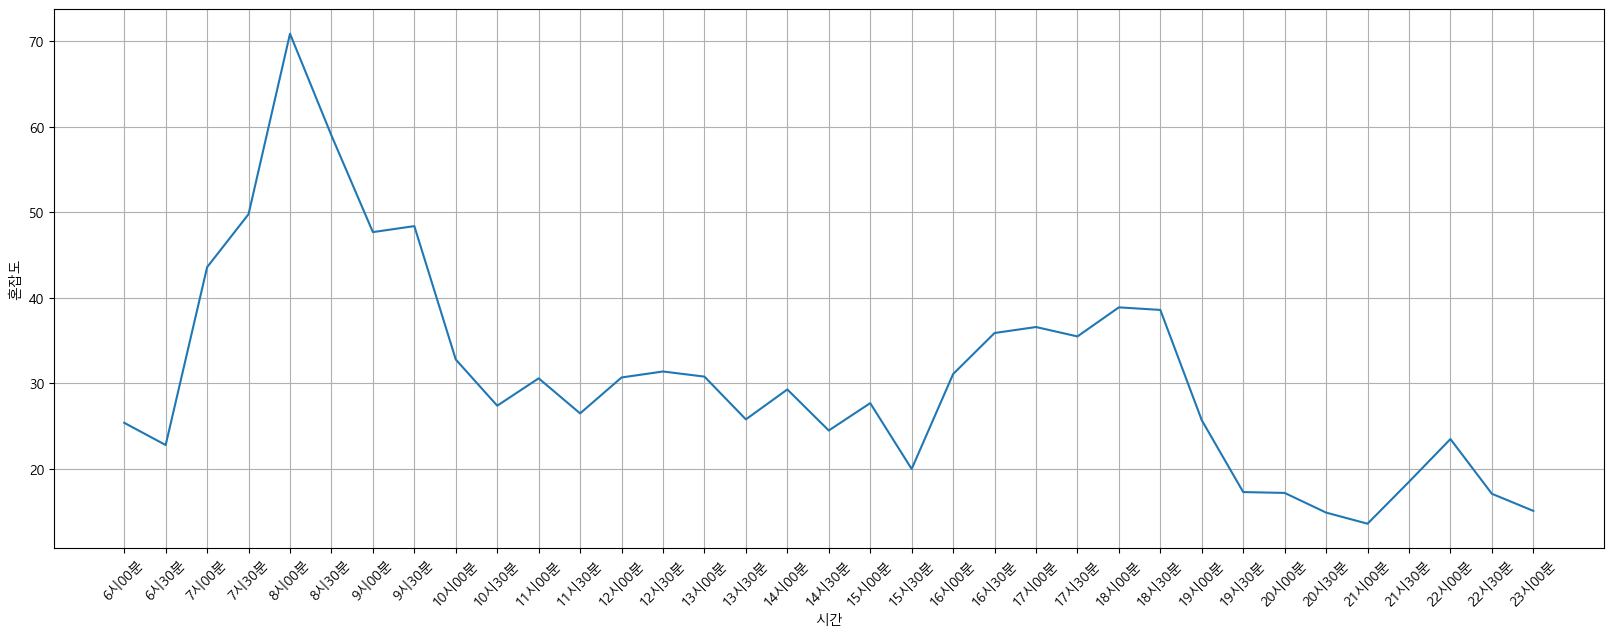

In [31]:
plt.figure(figsize = (20,7))
plt.plot(x,y)
plt.xticks(rotation=45)
plt.xlabel('시간')
plt.ylabel('혼잡도')
plt.grid()

#### 알 수 있는 점
- 출근 시간인 07:30~08:30까지는 혼잡도가 최대치
- 퇴근 시간인 17:30~18:30까지의 혼잡도도 40가량
- 밤 시간대에 혼잡도는 최저치

### 상선을 봤으니 하선도 보자.
- 총신대입구에서 가는 하선 열차의 평균 혼잡도
- 시간별 혼잡도를 그래프로 표현

In [35]:
cs_down = df[(df['출발역'] == '총신대입구')&(df['요일구분'] == '평일')&(df['호선'] == 4)&(df['상하구분'] == '하선')]
cs_down

,연번,요일구분,호선,역번호,출발역,상하구분,6시00분,6시30분,7시00분,7시30분,...,18시30분,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분
237,238,평일,4,432,총신대입구,하선,28.5,17.0,22.6,34.3,...,75.1,46.8,32.8,25.5,29.3,25.7,30.8,36.0,30.1,26.6


In [37]:
cs_down = cs_down.loc[:,'6시00분':]
cs_down

,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,10시30분,...,18시30분,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분
237,28.5,17.0,22.6,34.3,37.3,32.9,24.7,23.2,21.1,17.4,...,75.1,46.8,32.8,25.5,29.3,25.7,30.8,36.0,30.1,26.6


In [39]:
cs_down_mean = cs_down.mean(axis=1)
cs_down_mean
# 평균 혼잡도는 약 40

237    32.528571
dtype: float64

Text(0, 0.5, '혼잡도')

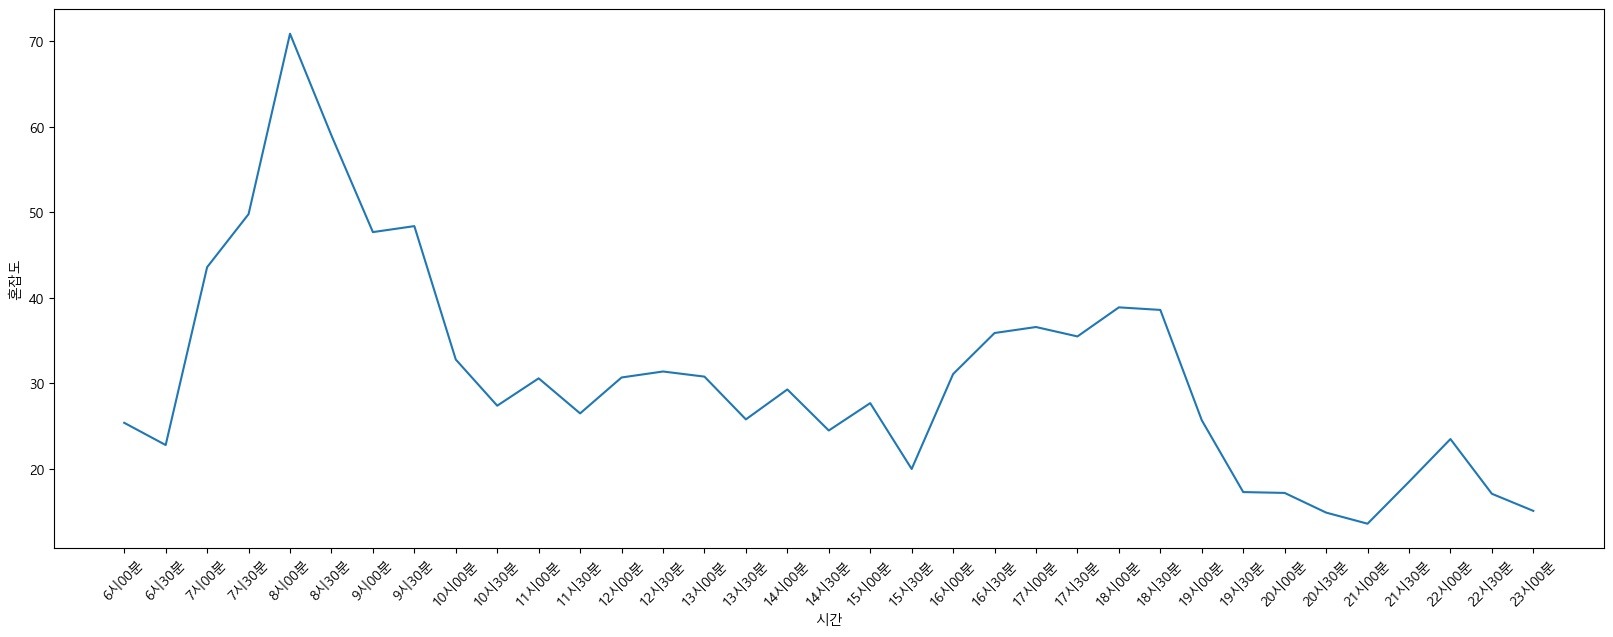

In [41]:
x = cs_down.columns
y_under = cs_down.values.reshape(-1)

plt.figure(figsize=(20,7))
plt.plot(x,y)
plt.xticks(rotation = 45)
plt.xlabel('시간')
plt.ylabel('혼잡도')

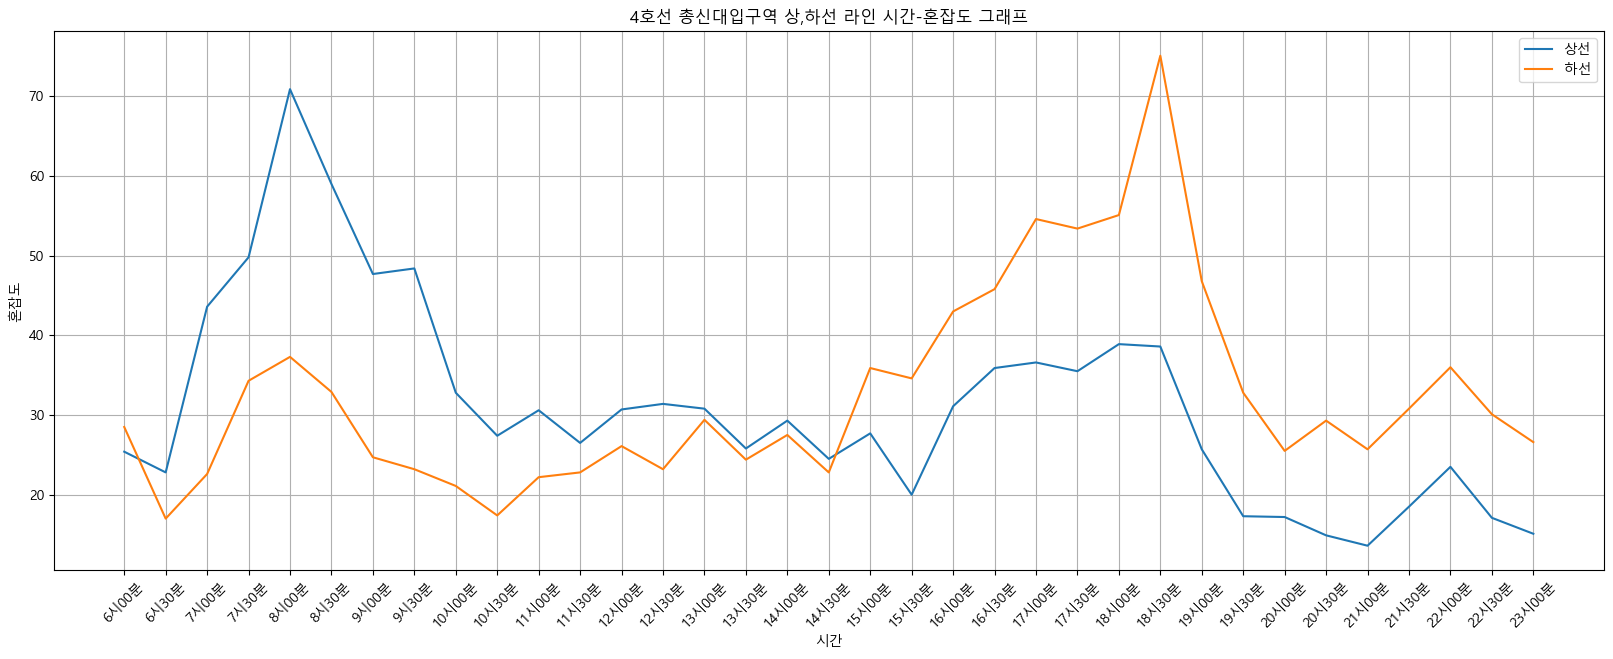

In [42]:
plt.figure(figsize=(20,7))
plt.plot(x,y, label = '상선')
plt.plot(x,y_under, label = '하선')
plt.xticks(rotation = 45)
plt.xlabel('시간')
plt.ylabel('혼잡도')
plt.title('4호선 총신대입구역 상,하선 라인 시간-혼잡도 그래프')
plt.legend()
plt.grid()

#### 알 수 있는 점
- 지하철을 이용하는 사람들은 직장 출퇴근용으로 많이 이용한다. 출퇴근 시간대에 혼잡도가 월등히 높음
- 총신대입구역을 기준으로 보았을 때 동작 방면(상선)으로 출근하는 사람들이 많고, 사당방면(하선)으로 퇴근하는 사람들이 많음.
- 즉, 총신대입구역을 기준으로 4호선 라인만 봤을 때 강북권에 직장이 많고 강남권에 주거하는 사람들이 많음을 유추할 수 있음.